In [ ]:
# generates mask from a sample img (1024x512 px) in 'cloud' dir 
# mask output to 'cloud/imgs' dir

import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb
import cv2
from PIL import Image

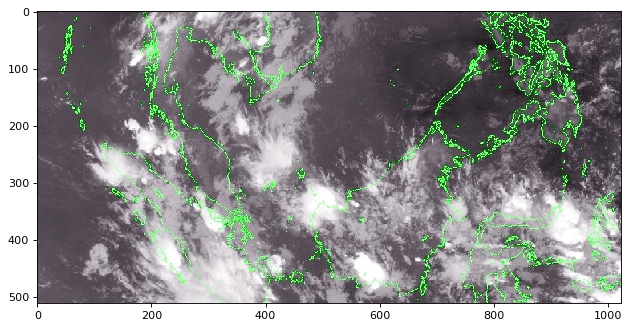

In [ ]:
img_path = 'imgs/to_generate_mask.jpg' #manually cropped sample img
img = imread(img_path)
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(img)

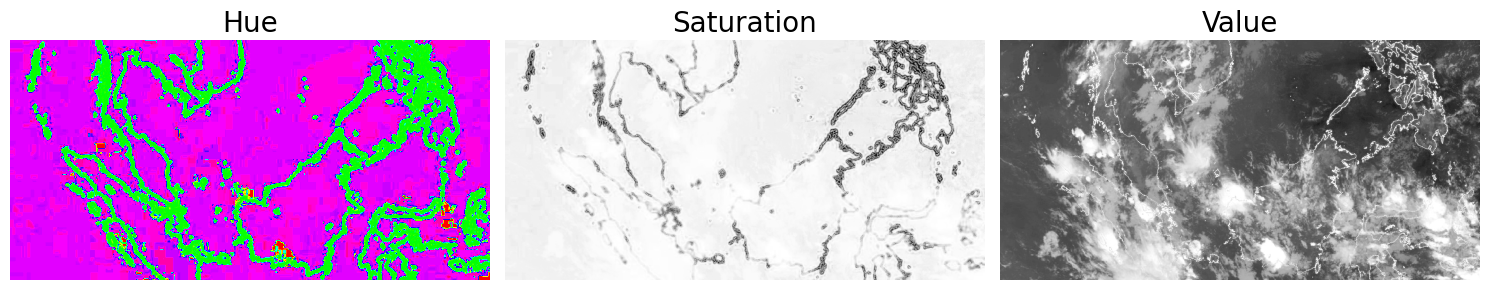

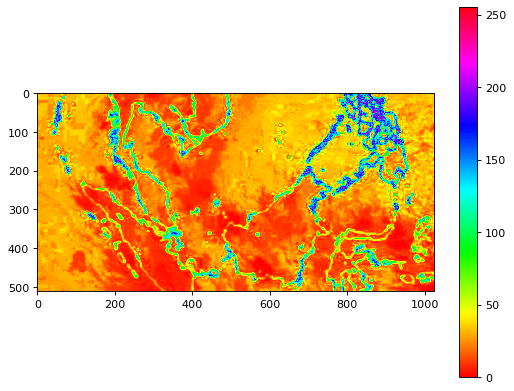

In [30]:
def display_as_hsv(image):

    img = imread(image)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    hsv_list = ['Hue','Saturation','Value']
    fig, ax = plt.subplots(1, 3, figsize=(15,7), sharey = True)

    ax[0].imshow(img_hsv[:,:,0], cmap = 'hsv')
    ax[0].set_title(hsv_list[0], fontsize = 20)
    ax[0].axis('off')

    ax[1].imshow(img_hsv[:,:,1], cmap = 'Greys')
    ax[1].set_title(hsv_list[1], fontsize = 20)
    ax[1].axis('off')

    ax[2].imshow(img_hsv[:,:,2], cmap = 'gray')
    ax[2].set_title(hsv_list[2], fontsize = 20)
    ax[2].axis('off')

    fig.tight_layout()
    
display_as_hsv(img_path)

img_hsv = img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(img_hsv[:,:,1], cmap='hsv')
plt.colorbar()

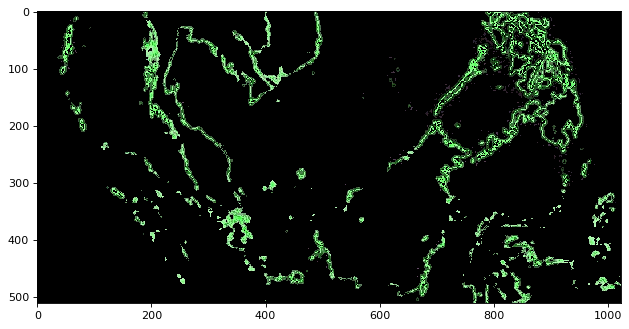

In [ ]:
lower_mask = img_hsv [:, :, 1] > 60
upper_mask = img_hsv [:, :, 1] < 210
saturation = img_hsv[:, :, 0] > 0
full_mask = upper_mask * lower_mask * saturation

red = img[:,:,0] * full_mask
green = img[:,:,1] * full_mask
blue = img[:,:,2] * full_mask

img_mask = np.dstack((red,green,blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(img_mask)
cv2.imwrite('imgs/borders_mask.jpg', img_mask)

True

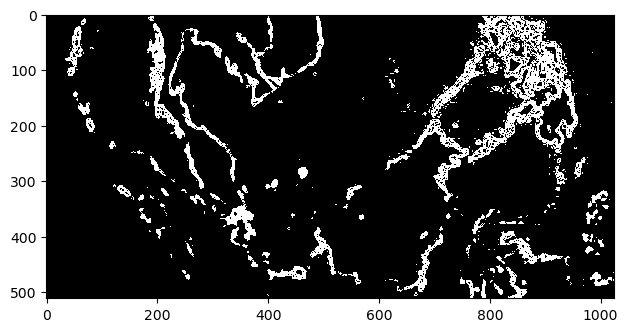

In [ ]:
_, img_mask_bin = cv2.threshold(img_mask, 0, 255, cv2.THRESH_BINARY)
imshow(img_mask_bin)
cv2.imwrite('imgs/borders_mask_binary.jpg', img_mask_bin) #final file to use for generating synthetic dataset